# Non Linear Regression and ReLU Activation

> Enzo Sergiani

## 1. Simulate the data

$f(x) = x \times \cos(x) + \text{noise}$


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
# Create noisy data
x_data = np.linspace(-10, 10, num=1000)
y_data = x_data * np.cos(x_data) + 2 * np.random.normal(size=1000)

## 2. Display curve to fit


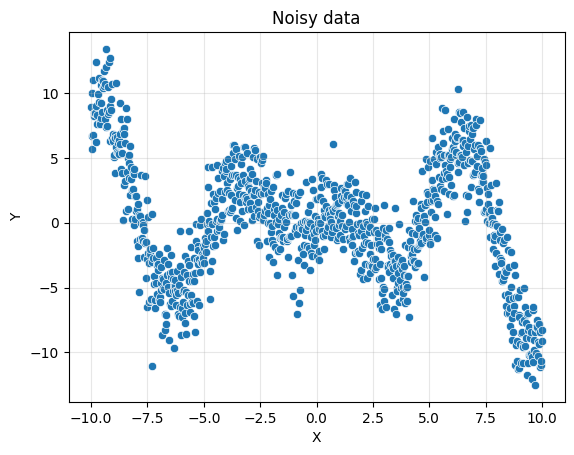

In [35]:
sns.scatterplot(x=x_data, y=y_data)
plt.title("Noisy data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True, alpha=0.3)
plt.show()

# 3. Create the model with a single neuron


In [36]:
model = Sequential([Dense(1, input_dim=1, activation="linear")])

model.compile(optimizer="adam", loss="mean_squared_error")

model.summary()

/home/enzo/dev/artificial_intelligence/tp/.env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 145.6599  
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 134.8578 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 132.9187 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.9654 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 118.2782 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 131.4342 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 116.8743
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 116.7367 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 119.1535 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 105.5588
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 104.8729 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 111.6126 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 103.5084
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 106.8891 
Epoch 15/100
32/32 ━━━━━━━━━━

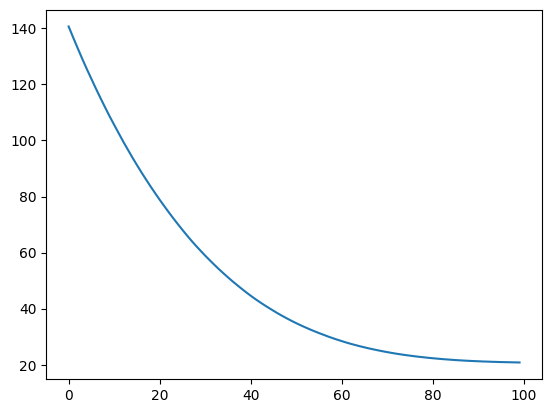

In [37]:
# Train the model
history = model.fit(x_data, y_data, epochs=100, batch_size=32, verbose=1)

plt.plot(history.history['loss'])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


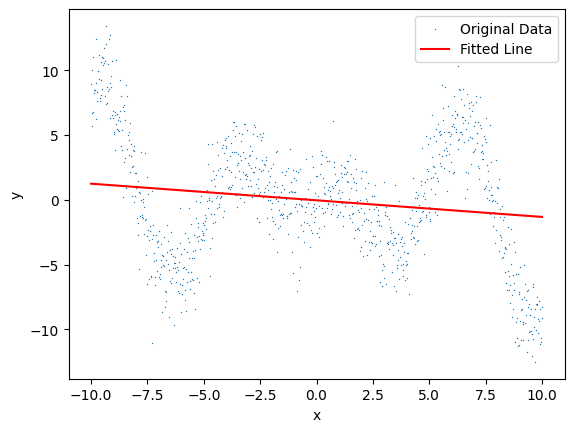

In [38]:
# Compute the output using model prediction
y_pred = model.predict(x_data)

# Display the result
sns.scatterplot(x=x_data, y=y_data, s=1, label="Original Data")
plt.plot(x_data, y_pred, color="red", label="Fitted Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# 4. Increase the number of neurons and layers

But keep activation function as 'linear'

<span style="color:red">REMEMBER : THE SUM OF LINEAR FUNCTIONS IS A LINEAR FUNCTION!</span>.


In [39]:
# Create the model with multiple layers and neurons
model = Sequential(
    [
        Dense(64, input_dim=1, activation="linear"),
        Dense(64, activation="linear"),
        Dense(1, activation="linear"),
    ]
)

model.compile(optimizer="adam", loss="mean_squared_error")

# Display the model summary
model.summary()

/home/enzo/dev/artificial_intelligence/tp/.env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Fit
model.fit(x_data, y_data, epochs=32, batch_size=32)

Epoch 1/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.2396   
Epoch 2/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.8024 
Epoch 3/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.9527 
Epoch 4/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.9571 
Epoch 5/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.5919 
Epoch 6/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.5399 
Epoch 7/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.6433 
Epoch 8/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.5812 
Epoch 9/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.8990 
Epoch 10/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.1284 
Epoch 11/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.7414 
Epoch 12/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.8226 
Epoch 13/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.8517 
Epoch 14/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.4240 
Epoch 15/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


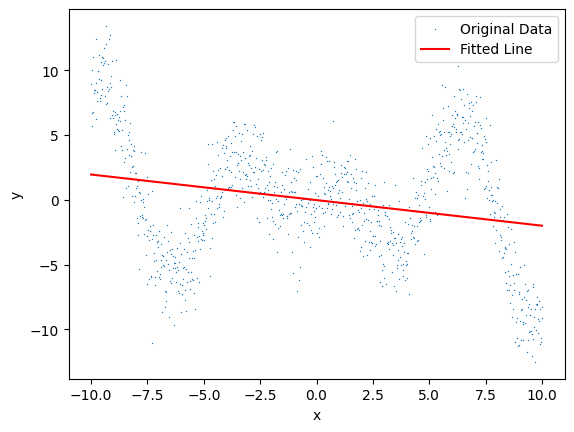

In [41]:
# Compute the output
y_pred = model.predict(x_data)

# Display the result
sns.scatterplot(x=x_data, y=y_data, s=1, label="Original Data")
plt.plot(x_data, y_pred, color="red", label="Fitted Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# 5. Introduce the RELU activation function

Now , change activation function of the layers into 'relu' for the hidden layers (output stays linear)


In [42]:
# Create the model
model = Sequential(
    [
        Dense(64, input_dim=1, activation="relu"),
        Dense(64, activation="relu"),
        Dense(1, activation="linear"),
    ]
)

model.compile(optimizer="adam", loss="mse")

# Display the model summary
model.summary()

/home/enzo/dev/artificial_intelligence/tp/.env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

# Predict and display


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.7052   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.6066 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.8467
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.6694 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.4738 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.8848 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.5045 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.3013 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.2502 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.2626 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.0338 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.1534 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.4471 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.9094 
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s

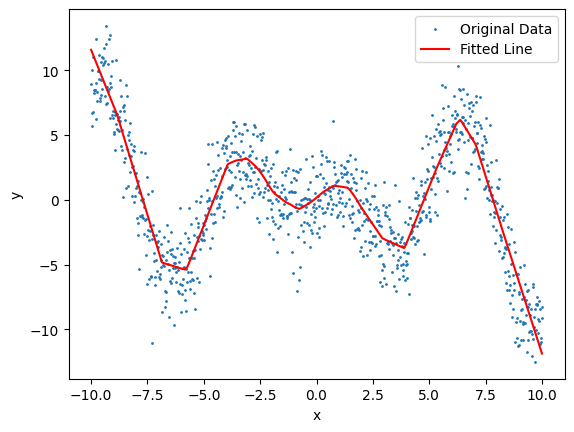

In [43]:
# Fit the model
model.fit(x_data, y_data, epochs=100, batch_size=32)

# Compute the output
y_pred = model.predict(x_data)

# Display the result
plt.scatter(x_data, y_data, s=1, label="Original Data")
plt.plot(x_data, y_pred, color="red", label="Fitted Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()